In [11]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
 confusion_matrix, ConfusionMatrixDisplay,
 roc_curve, auc, accuracy_score, precision_score,
 recall_score, f1_score, log_loss
 )
 

In [13]:
breast_cancer = load_breast_cancer()

In [14]:
print("[유방암 데이터 컬럼명] ", breast_cancer.keys()) 
print("[유방암 데이터 구조] ", breast_cancer.data.shape)
print("[유방암 데이터 변수명] ", breast_cancer.feature_names)

[유방암 데이터 컬럼명]  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
[유방암 데이터 구조]  (569, 30)
[유방암 데이터 변수명]  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [15]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [20]:
df = pd.DataFrame(data = breast_cancer.data, columns = breast_cancer.feature_names)
df = df.iloc[:, :10]

In [21]:
df["label"] = breast_cancer.target
df.coulmns = [col.replace(" ","_")for col in df.columns]
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_11936\1470119529.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.coulmns = [col.replace(" ","_")for col in df.columns]


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0


In [22]:
train, test = train_test_split(df, test_size=0.15, random_state=1)
train, val = train_test_split(train, test_size = 0.18, random_state=1)
train.shape, val.shape, test.shape

((396, 11), (87, 11), (86, 11))

In [32]:
feature = train.columns[:-1]
X_train = train[feature]
y_train = train["label"]
X_val = val[feature]
y_val = val["label"]
X_test = test[feature]
y_test = test["label"]
print("feature Matrix: ", X_train.shape, X_val.shape, X_test.shape)
print("target vector: ", y_train.shape, y_val.shape, y_test.shape)


feature Matrix:  (396, 10) (87, 10) (86, 10)
target vector:  (396,) (87,) (86,)


In [33]:
scaler = StandardScaler()
X_train_sclaed = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
X_train_sclaed.T[0].mean(), X_train_sclaed.std()

(-2.444733528972567e-16, 1.0)

In [34]:
logistic = LogisticRegression()
logistic.fit(X_train_sclaed,y_train)

LogisticRegression()

In [35]:
logistic.score(X_val_scaled,y_val)

0.9310344827586207

In [36]:
logistic.coef_

array([[-0.94671669, -1.31869497, -0.8015939 , -1.04721446, -0.90735141,
         0.08900628, -1.16921536, -1.4349483 , -0.4076842 ,  0.46315487]])

In [37]:
print(logistic.score(X_test_scaled,y_test))

0.9534883720930233


In [38]:
y_pred = logistic.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred)
rec = recall_score(y_test, y_pred, zero_division=0)
fpr, tpr, thr = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
rmse = np.sqrt(np.mean((y_test- y_pred)**2))

print("\n=== 성능 지표 ===")
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1: {f1:.3f}")    
print(f"AUC: {roc_auc:.3f}")
print(f"RMSE: {rmse:.3f}")


=== 성능 지표 ===
Accuracy: 0.953
Precision: 0.929
Recall: 1.000
F1: 0.963
AUC: 0.941
RMSE: 0.216


<Figure size 640x480 with 0 Axes>

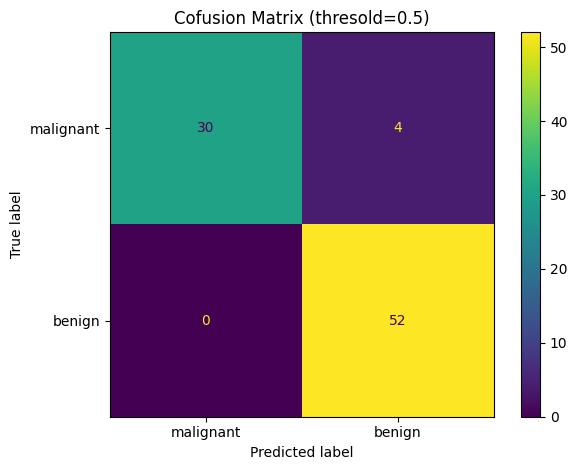

In [40]:
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=breast_cancer.target_names)
plt.figure()
disp.plot(values_format="d")
plt.title("Cofusion Matrix (thresold=0.5)")
plt.tight_layout()
plt.show()

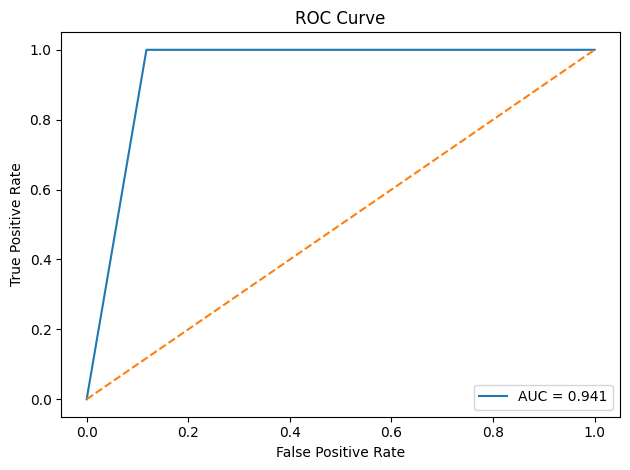

In [41]:
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()